<a href="https://colab.research.google.com/github/abhishekbhat11/DSML/blob/main/Task3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('car data.csv')

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
to_drop = ['Year', 'Kms_Driven', 'Fuel_Type', 'Transmission', 'Owner']

In [6]:
df.drop(columns=to_drop, inplace=True)

In [7]:
df['Car_Name'].is_unique

False

In [8]:
df = df.set_index('Car_Name')
df.head()

,Selling_Price,Present_Price,Seller_Type
Car_Name,,,
ritz,3.35,5.59,Dealer
sx4,4.75,9.54,Dealer
ciaz,7.25,9.85,Dealer
wagon r,2.85,4.15,Dealer
swift,4.60,6.87,Dealer


In [9]:
df.iloc[3:5]

,Selling_Price,Present_Price,Seller_Type
Car_Name,,,
wagon r,2.85,4.15,Dealer
swift,4.60,6.87,Dealer


In [10]:
df.isnull() #checks for null values 

,Selling_Price,Present_Price,Seller_Type
Car_Name,,,
ritz,False,False,False
sx4,False,False,False
ciaz,False,False,False
wagon r,False,False,False
swift,False,False,False
...,...,...,...
city,False,False,False
brio,False,False,False
city,False,False,False


In [11]:
df_new = df.copy() 
df_new.dropna()

,Selling_Price,Present_Price,Seller_Type
Car_Name,,,
ritz,3.35,5.59,Dealer
sx4,4.75,9.54,Dealer
ciaz,7.25,9.85,Dealer
wagon r,2.85,4.15,Dealer
swift,4.60,6.87,Dealer
...,...,...,...
city,9.50,11.60,Dealer
brio,4.00,5.90,Dealer
city,3.35,11.00,Dealer


In [12]:
df_new.fillna(value = df_new.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,Selling_Price,Present_Price,Seller_Type
Car_Name,,,
ritz,3.35,5.59,Dealer
sx4,4.75,9.54,Dealer
ciaz,7.25,9.85,Dealer
wagon r,2.85,4.15,Dealer
swift,4.60,6.87,Dealer
...,...,...,...
city,9.50,11.60,Dealer
brio,4.00,5.90,Dealer
city,3.35,11.00,Dealer


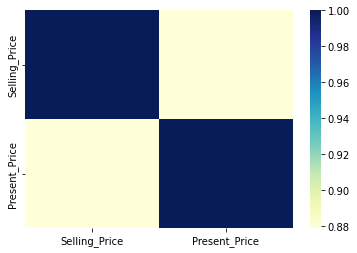

In [13]:
import seaborn as sns
data_copy = df.copy()
corr = data_copy.corr() #finding the correlation 
sns.heatmap(corr, cmap='YlGnBu') #cmap is used to alter the colour of the heatmap

In [14]:
import sklearn as sks

In [15]:
x=df.iloc[:,:-1]
y=df.iloc[:,2]
y

Car_Name
ritz       Dealer
sx4        Dealer
ciaz       Dealer
wagon r    Dealer
swift      Dealer
            ...  
city       Dealer
brio       Dealer
city       Dealer
city       Dealer
brio       Dealer
Name: Seller_Type, Length: 301, dtype: object

In [16]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=0.70)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=3)

In [18]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [19]:
classifier.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [20]:
y_pred=classifier.predict(xtest)

In [21]:
from sklearn.metrics import classification_report

In [22]:
classification_report(ytest,y_pred)

'              precision    recall  f1-score   support\n\n      Dealer       0.95      1.00      0.97        53\n  Individual       1.00      0.92      0.96        38\n\n    accuracy                           0.97        91\n   macro avg       0.97      0.96      0.97        91\nweighted avg       0.97      0.97      0.97        91\n'

In [30]:
from sklearn.metrics import r2_score
g  = df ['Selling_Price'].tolist()
f = df ['Present_Price'].tolist()
r2 = r2_score(g, f)
print('r2 score for the model is', r2)

r2 score for the model is -0.244456908621421


In [31]:
p = df ['Selling_Price'].tolist()
q = df ['Present_Price'].tolist()
summation = 0  #variable to store the summation of differences
n = len(p) #finding total number of items in list
for i in range (0,n):  #looping through each element of the list
  difference = p[i] - q[i]  #finding the difference between observed and predicted value
  squared_difference = difference**2  #taking square of the differene 
  summation = summation + squared_difference  #taking a sum of all the differences
MSE = summation/n  #dividing summation by total values to obtain average
print ("The Mean Square Error is: " , MSE)

The Mean Square Error is:  32.04369869767435
